In [1]:
import pandas as pd

In [2]:
import numpy as np

In [12]:
file_path = "../datasets/Mappa-dei-pub-circoli-locali-in-Italia.json"
df = pd.read_json(file_path, encoding='latin1')
df

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,Ala di Stura,TORINO,Piemonte,,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150
...,...,...,...,...,...,...,...,...,...
2492,Barletta (BT),BARLETTA ANDRIA TRANI,Puglia,Santa Croce,2010,2010-01-17T16:15:08Z,615632993,16.285782,41.320671
2493,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Auld Dublin,2014,2014-03-03T20:56:16Z,2613737619,16.497204,41.241814
2494,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Ferus,2014,2014-01-07T19:22:18Z,2613737620,16.506175,41.240957
2495,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Re Artù,2009,2009-09-04T07:57:05Z,482836935,16.418124,41.281518


In [ ]:
"""Esercizio 2/2 
Esaminiamo il dataset: 
• quanti dati ci sono in totale? 
• quali sono i metadati? 
• stampiamo il primo elemento 
• stampiamo l'ultimo elemento 
• riusciamo a stampare un elemento a caso? 
• quali sono gli anni di inserimento presenti? 
• quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46? 
• quante attività ci sono nella provincia di Vicenza? 
• quante enoteche ci sono, e come si chiamano?
• quante attività ci sono in Lazio e Abruzzo assieme?"""

In [13]:
#quanti dati ci sono in totale?
df.shape

(2497, 9)

In [14]:
#quali sono i metadati?
df.dtypes

ccomune                              object
cprovincia                           object
cregione                             object
cnome                                object
canno_inserimento                     int64
cdata_e_ora_inserimento              object
cidentificatore_in_openstreetmap      int64
clongitudine                        float64
clatitudine                         float64
dtype: object

In [15]:
df.columns = [col.lstrip('c') for col in df.columns]        #abbiamo eliminato tutte le c iniziali dai nomi delle colonne

In [19]:
df.rename(columns={'omune':'comune'}, inplace=True)         #abbiamo modicifato la colonna comune, rimettendo la c

In [20]:
df.dtypes

comune                              object
provincia                           object
regione                             object
nome                                object
anno_inserimento                     int64
data_e_ora_inserimento              object
identificatore_in_openstreetmap      int64
longitudine                        float64
latitudine                         float64
dtype: object

In [23]:
#stampiamo il primo elemento
df.head(1)

,comune,provincia,regione,nome,anno_inserimento,data_e_ora_inserimento,identificatore_in_openstreetmap,longitudine,latitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [22]:
#stampiamo l'ultimo elemento 
df.tail(1)

,comune,provincia,regione,nome,anno_inserimento,data_e_ora_inserimento,identificatore_in_openstreetmap,longitudine,latitudine
2496,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [21]:
#riusciamo a stampare un elemento a caso? 
df.sample(1)

,comune,provincia,regione,nome,anno_inserimento,data_e_ora_inserimento,identificatore_in_openstreetmap,longitudine,latitudine
72,Torino,TORINO,Piemonte,Manhattan Pub,2013,2013-07-30T16:04:08Z,1328570739,7.674742,45.09279


In [25]:
#quali sono gli anni di inserimento presenti?
df['anno_inserimento'].unique()

array([2011, 2015, 2010, 2012, 2014, 2016, 2013, 2008, 2009, 2007],
      dtype=int64)

In [37]:
#quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46? 
attività = df[((df['longitudine']>=9) & (df['longitudine']<=10)) & ((df['latitudine']>=45) & (df['latitudine']<=46))]
print(len(attività))

303


In [51]:
#quante attività ci sono nella provincia di Vicenza?
attività_vicenza = df[(df['comune'] == 'Vicenza')]
print(len(attività_vicenza))

attività_vicenza = df[(df['provincia'] == 'Vicenza')]
print(len(attività_vicenza))

5
0


In [55]:
#quante enoteche ci sono, e come si chiamano?
enoteche = df.nome.replace(' ', np.nan).count()
print("ci sono", enoteche, "enoteche")
print("i loro nomi sono:")
print(df['nome'])

ci sono 2497 enoteche
i loro nomi sono:
0                      
1           Lenny's Pub
2       Murrayfield Pub
3                Snop?e
4                      
             ...       
2492        Santa Croce
2493        Auld Dublin
2494              Ferus
2495            Re Artù
2496       Well's Fargo
Name: nome, Length: 2497, dtype: object


In [58]:
#quante attività ci sono in Lazio e Abruzzo assieme?
regioni = df[df['regione'].isin(['Lazio', 'Abruzzo'])]    #conteggio singolo
conteggi_per_regione = regioni.groupby("regione")["nome"].count()
print(conteggi_per_regione)

regione
Abruzzo     48
Lazio      189
Name: nome, dtype: int64


In [60]:
#conteggio totale
conteggio = df[(df.regione == 'Lazio') | (df.regione == 'Abruzzo')].shape[0]
print(conteggio)

237


In [66]:
"""Esercizio 
Il dataset insurance.csv dei beginner_datasets contiene dati su caratteristiche 
e abitudini delle persone rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute. 
• Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna; 
• Quali sono le medie di charges rispetto a region? Ci sono differenze significative? 
• E rispetto a smoker? E a sex? 
• Quali sono i descrittori statistici di bmi? 
Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi? 
Nota: è lo stesso esercizio della volta scorsa, ma stavolta da eseguire con il metodo .groupby()"""

import pandas as pd
ins = pd.read_csv("beginner datasets 1/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
ins.shape

(1338, 7)

In [72]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [73]:
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [77]:
#Quali sono le medie di charges rispetto a region? Ci sono differenze significative? E rispetto a smoker? E a sex?
ins.groupby(['region', 'smoker', 'sex'])['charges'].mean()

region     smoker  sex   
northeast  no      female     9640.426984
                   male       8664.042222
           yes     female    28032.046398
                   male      30926.252583
northwest  no      female     8786.998679
                   male       8320.689321
           yes     female    29670.824946
                   male      30713.181419
southeast  no      female     8440.205552
                   male       7609.003587
           yes     female    33034.820716
                   male      36029.839367
southwest  no      female     8234.091260
                   male       7778.905534
           yes     female    31687.988430
                   male      32598.862854
Name: charges, dtype: float64

In [79]:
#Quali sono le medie di charges rispetto a region?
ins.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [76]:
#E rispetto a smoker? E a sex?
ins.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [78]:
ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [81]:
#Quali sono i descrittori statistici di bmi?
#Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi? 

ins.groupby('bmi').describe().transpose()

bmi                15.960       16.815       17.195        17.290      17.385  \
age      count     1.0000     2.000000      1.00000      3.000000     1.00000   
         mean     18.0000    29.500000     26.00000     27.666667    23.00000   
         std          NaN    12.020815          NaN      9.504385         NaN   
         min      18.0000    21.000000     26.00000     18.000000    23.00000   
         25%      18.0000    25.250000     26.00000     23.000000    23.00000   
         50%      18.0000    29.500000     26.00000     28.000000    23.00000   
         75%      18.0000    33.750000     26.00000     32.500000    23.00000   
         max      18.0000    38.000000     26.00000     37.000000    23.00000   
children count     1.0000     2.000000      1.00000      3.000000     1.00000   
         mean      0.0000     1.500000      2.00000      1.333333     1.00000   
         std          NaN     0.707107          NaN      1.154701         NaN   
         min       0.0000     1.000000      2.00000      0.000000     1.00000   
         25%       0.0000     1.250000      2.00000      1.000000     1.00000   
         50%       0.0000     1.500000      2.00000      2.000000     1.00000   
         75%       0.0000     1.750000      2.00000      2.000000     1.00000   
         max       0.0000     2.000000      2.00000      2.000000     1.00000   
charges  count     1.0000     2.000000      1.00000      3.000000     1.00000   
         mean   1694.7964  4904.000350  14455.64405   7813.353433  2775.19215   
         std          NaN  2455.844784          NaN   4619.986089         NaN   
         min    1694.7964  3167.455850  14455.64405   3732.625100  2775.19215   
         25%    1694.7964  4035.728100  14455.64405   5305.302600  2775.19215   
         50%    1694.7964  4904.000350  14455.64405   6877.980100  2775.19215   
         75%    1694.7964  5772.272600  14455.64405   9853.717600  2775.19215   
         max    1694.7964  6640.544850  14455.64405  12829.455100  2775.19215   

bmi               17.400     17.480     17.670      17.765    17.800  ...  \
age      count     1.000     1.0000     1.0000      1.0000     1.000  ...   
         mean     21.000    19.0000    26.0000     32.0000    19.000  ...   
         std         NaN        NaN        NaN         NaN       NaN  ...   
         min      21.000    19.0000    26.0000     32.0000    19.000  ...   
         25%      21.000    19.0000    26.0000     32.0000    19.000  ...   
         50%      21.000    19.0000    26.0000     32.0000    19.000  ...   
         75%      21.000    19.0000    26.0000     32.0000    19.000  ...   
         max      21.000    19.0000    26.0000     32.0000    19.000  ...   
children count     1.000     1.0000     1.0000      1.0000     1.000  ...   
         mean      1.000     0.0000     0.0000      2.0000     0.000  ...   
         std         NaN        NaN        NaN         NaN       NaN  ...   
         min       1.000     0.0000     0.0000      2.0000     0.000  ...   
         25%       1.000     0.0000     0.0000      2.0000     0.000  ...   
         50%       1.000     0.0000     0.0000      2.0000     0.000  ...   
         75%       1.000     0.0000     0.0000      2.0000     0.000  ...   
         max       1.000     0.0000     0.0000      2.0000     0.000  ...   
charges  count     1.000     1.0000     1.0000      1.0000     1.000  ...   
         mean   2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         std         NaN        NaN        NaN         NaN       NaN  ...   
         min    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         25%    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         50%    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         75%    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   
         max    2585.269  1621.3402  2680.9493  32734.1863  1727.785  ...   

bmi                 46.750       47.410     47.5

In [82]:
"""Esercizio 
Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets e calcoliamo: 
• La media della lunghezza dei petali di tutto il dataset 
• La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby() 
• Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()"""

iris = pd.read_csv("beginner datasets 2/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [84]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [85]:
iris.shape

(150, 5)

In [88]:
#La media della lunghezza dei petali di tutto il dataset
petali = iris['petal_length'].mean().round(2)
print(petali)

3.76


In [93]:
#La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby() 
iris.groupby('species')['petal_length'].mean()

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [92]:
#Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
iris.groupby('species')['sepal_width'].agg(["mean", "min", "max"])

,mean,min,max
species,,,
Iris-setosa,3.418,2.3,4.4
Iris-versicolor,2.770,2.0,3.4
Iris-virginica,2.974,2.2,3.8


In [95]:
"""Esercizio 
Nei beginner_datasets, il dataset wine.csv contiene delle analisi organolettiche su diverse qualità di vini: 
• Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale? 
• C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi? 
• Rifacendo le analisi delle domande precedenti ma per il pH, cambia qualcosa? 
• E per i solfati?"""

wine = pd.read_csv("beginner datasets 2/wine.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [96]:
wine.shape

(6497, 13)

In [97]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [98]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [103]:
#Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
wine.groupby('quality')['alcohol'].mean().round(2)

quality
3    10.22
4    10.18
5     9.84
6    10.59
7    11.39
8    11.68
9    12.18
Name: alcohol, dtype: float64

In [102]:
wine['alcohol'].mean()     #media totale

10.491800831149453

In [104]:
#C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi? 
wine.groupby('type')['alcohol'].mean().round(2)

type
red      10.42
white    10.51
Name: alcohol, dtype: float64

In [107]:
#Rifacendo le analisi delle domande precedenti ma per il pH, cambia qualcosa? 
wine.groupby(['quality', 'type'])['pH'].mean().round(2)

quality  type 
3        red      3.40
         white    3.19
4        red      3.38
         white    3.18
5        red      3.30
         white    3.17
6        red      3.32
         white    3.19
7        red      3.29
         white    3.21
8        red      3.27
         white    3.22
9        white    3.31
Name: pH, dtype: float64

In [108]:
#E per i solfati?
wine.groupby(['quality', 'type'])['sulphates'].mean().round(2)

quality  type 
3        red      0.57
         white    0.47
4        red      0.60
         white    0.48
5        red      0.62
         white    0.48
6        red      0.68
         white    0.49
7        red      0.74
         white    0.50
8        red      0.77
         white    0.49
9        white    0.47
Name: sulphates, dtype: float64

In [109]:
"""Esercizio 1/3 
Nei beginner_datasets, il file boston.csv contiene il Boston Housing Dataset, 
che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. 
Di seguito vengono descritte le colonne del dataset: 
• CRIM - tasso di criminalità pro capite per città 
• ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati. 
• INDUS - percentuale di acri di attività commerciali non al dettaglio per città. 
• CHAS - variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti)
• NOX - concentrazione di ossidi di azoto (parti per 10 milioni). 
• RM - numero medio di stanze per abitazione 
• AGE - proporzione di unità abitative occupate da proprietari costruite prima del 1940 
• DIS - distanze ponderate da cinque centri occupazionali di Boston 
• RAD - indice di accessibilità alle autostrade radiali 
• TAX - aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari 
• PTRATIO - rapporto alunni-insegnanti per città 
• BLACK - la percentuale di neri per città 
• LSTAT - % di popolazione di condizione più bassa 
• MEDV - Valore mediano delle case, espresso in migliaia di dollari"""

boston = pd.read_csv("beginner datasets 1/boston.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [110]:
boston.shape

(506, 14)

In [111]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [ ]:
"""Esercizio 3/3 
• La media del prezzo delle case cambia a seconda della distanza dal fiume Charles? 

• Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato? 

• Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? 
E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato? 

• Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni?
E del numero di stanze? E delle tasse? 
"""

In [117]:
#La media del prezzo delle case cambia a seconda della distanza dal fiume Charles? 
p_medio = boston.groupby('chas')['medv'].mean()*1000
p_medio.round().astype(int)

chas
0    22094
1    28440
Name: medv, dtype: int32

In [118]:
#Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato? 
boston.loc[:, ['crim', 'medv']].corr()

,crim,medv
crim,1.000000,-0.388305
medv,-0.388305,1.000000


<Axes: ylabel='Frequency'>

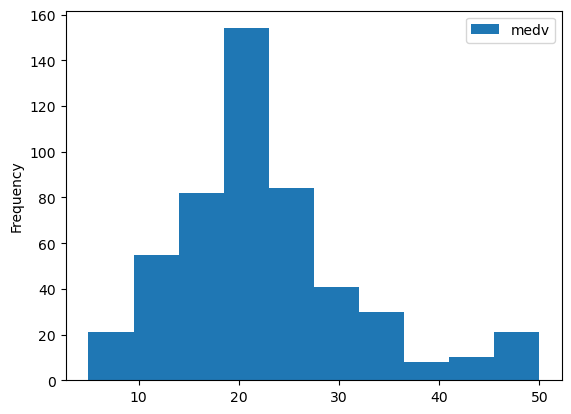

In [125]:
boston.loc[:, ['crim', 'medv']].plot.hist(x='crim', y='medv')

In [130]:
# Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? 
#E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?

boston.groupby('ptratio')['rm'].mean()

ptratio
12.6    7.222667
13.0    7.406167
13.6    7.923000
14.4    7.875000
14.7    6.246235
14.8    6.752333
14.9    7.311250
15.1    6.816000
15.2    6.421923
15.3    6.705333
15.5    7.241000
15.6    6.702000
15.9    6.997000
16.0    6.230600
16.1    6.428800
16.4    6.139667
16.6    6.344188
16.8    6.146750
16.9    6.016400
17.0    6.868250
17.3    6.383000
17.4    7.212333
17.6    6.822429
17.8    6.496130
17.9    6.134818
18.0    7.218600
18.2    6.283000
18.3    6.520500
18.4    6.285938
18.5    6.288750
18.6    6.111588
18.7    6.406556
18.8    5.956000
18.9    5.785667
19.0    6.453750
19.1    6.234882
19.2    6.053632
19.6    6.224000
19.7    6.303250
20.1    5.585400
20.2    6.024021
20.9    6.266273
21.0    6.039778
21.1    5.888000
21.2    6.028533
22.0    5.799500
Name: rm, dtype: float64

In [131]:
boston.groupby('ptratio')['medv'].mean()

ptratio
12.6    32.733333
13.0    38.025000
13.6    50.000000
14.4    50.000000
14.7    25.717647
14.8    25.433333
14.9    40.475000
15.1    31.600000
15.2    26.276923
15.3    26.066667
15.5    32.700000
15.6    30.100000
15.9    30.250000
16.0    24.320000
16.1    24.880000
16.4    23.216667
16.6    23.856250
16.8    22.150000
16.9    19.640000
17.0    30.600000
17.3    24.700000
17.4    33.544444
17.6    30.700000
17.8    26.956522
17.9    22.363636
18.0    33.100000
18.2    22.150000
18.3    27.100000
18.4    23.131250
18.5    23.800000
18.6    24.335294
18.7    25.122222
18.8    17.350000
18.9    20.100000
19.0    24.900000
19.1    22.894118
19.2    22.805263
19.6    22.575000
19.7    21.787500
20.1    12.800000
20.2    16.611429
20.9    21.118182
21.0    17.351852
21.1    18.900000
21.2    17.093333
22.0    19.400000
Name: medv, dtype: float64

<Axes: ylabel='Frequency'>

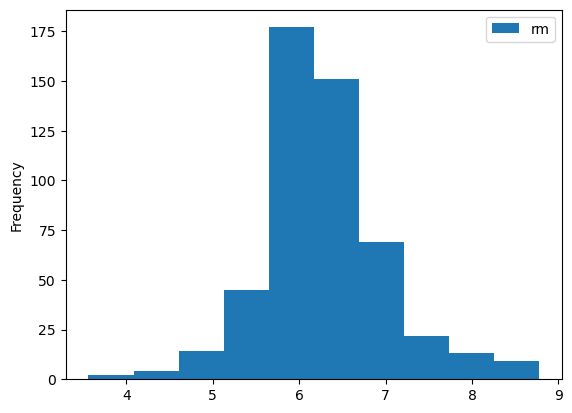

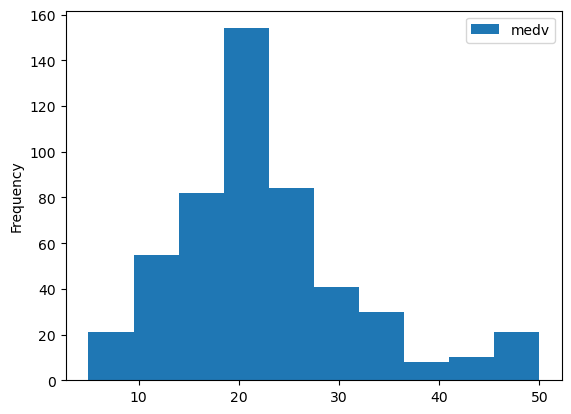

In [124]:
boston.loc[:, ['ptratio', 'rm']].plot.hist(x='ptratio', y='rm')    #numero di stanze
boston.loc[:, ['ptratio', 'medv']].plot.hist(x='ptratio', y='medv')   #valore delle case

In [127]:
# Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni?
# E del numero di stanze? E delle tasse? 
boston.groupby(['rad', 'rm', 'age'])['tax'].mean().round(2)

rad  rm     age 
1    5.706  28.4    304.0
     5.876  19.1    315.0
     6.030  80.8    273.0
     6.031  23.3    304.0
     6.108  32.0    315.0
                    ...  
24   7.016  97.5    666.0
     7.061  77.0    666.0
     7.313  97.9    666.0
     7.393  99.3    666.0
     8.780  82.9    666.0
Name: tax, Length: 505, dtype: float64

In [3]:
"""Esercizio 1/3
Abbiamo un DataFrame di dipendenti: """
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 
'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 
'department_id': [1, 2, 1, 2, 3] })

In [4]:
"""Esercizio 2/3 
E un DataFrame di dipartimenti: """
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 
'department_name': ['HR', 'IT', 'Finance'], 
'location': ['New York', 'San Francisco', 'Chicago'] })

In [ ]:
"""Esercizio 3/3 
• Unire questi DataFrame in base alla colonna comune department_id, 
in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge() 
• Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente;
poi unire i due dataset mediante il metodo .join() 
• Ci sono differenze nel risultato? Quali? Perché?"""

In [5]:
# Unire questi DataFrame in base alla colonna comune department_id, 
#in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge() 
merged_df = employees_df.merge(departments_df, on='department_id')
merged_df

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,103,Charlie,1,HR,New York
2,102,Bob,2,IT,San Francisco
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [6]:
#Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente;
#poi unire i due dataset mediante il metodo .join() 

employees_df.set_index('department_id', inplace=True)
departments_df.set_index('department_id', inplace=True)
joined_df = employees_df.join(departments_df)
joined_df

#la differenza è che ora l'indice è department_id

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
1,103,Charlie,HR,New York
2,102,Bob,IT,San Francisco
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


In [101]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd

dotenv.load_dotenv(override=True)
username=os.getenv("username")
password=os.getenv("password")
host=os.getenv("host")
dbname=os.getenv("dbname")

conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)

show_tables = pd.read_sql("Show Tables", db_engine)

df_employee = pd.read_sql("SELECT * FROM dimemployee", db_engine)
df_employee_sales_territory = pd.read_sql("SELECT * FROM dimemployeesalesterritory", db_engine)
df_sales_territory = pd.read_sql("SELECT * FROM dimsalesterritory", db_engine)
db_engine.dispose()
show_tables

,Tables_in_AdventureWorksDW
0,adventureworksdwbuildversion
1,dimaccount
2,dimcurrency
3,dimcustomer
4,dimdate
5,dimdepartmentgroup
6,dimemployee
7,dimemployeesalesterritory
8,dimgeography
9,dimorganization


In [ ]:
"""Esercizio 
• Dal database AdventureWorksDW importiamo le tabelle dimemployee e dimemployeesalesterritory come DataFrame 
• Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey 
• Controlliamo la dimensione del DataFrame risultante: è quella attesa? 
• Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa 
e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey 
• Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region) 
• Valutiamo la media del BaseRate per ogni paese: ci sono differenze?"""

In [102]:
df_employee.set_index('EmployeeKey', inplace=True)

In [103]:
df_employee_sales_territory.set_index('EmployeeKey', inplace=True)

In [104]:
#Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey 
joined_df = df_employee.join(df_employee_sales_territory)
joined_df

,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,BirthDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
EmployeeKey,,,,,,,,,,,,,,,,,,,,,
1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,1981-11-12,...,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,1986-12-01,...,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,1974-06-12,...,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,1975-04-30,...,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,7.0
293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,1977-08-05,...,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0
294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,1974-08-11,...,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,9.0


In [79]:
#Controlliamo la dimensione del DataFrame risultante: è quella attesa?
df_employee.shape

(296, 27)

In [80]:
df_employee_sales_territory.shape

(39, 1)

In [81]:
joined_df.shape

(317, 28)

In [ ]:
#Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa 
#e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey 

In [106]:
df_sales_territory.shape

(11, 6)

In [105]:
df_sales_territory

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
5,6,6,Canada,Canada,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
6,7,7,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
7,8,8,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
8,9,9,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
9,10,10,United Kingdom,United Kingdom,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [119]:
joined_df.reset_index(inplace=True, drop=False)

In [107]:
df_sales_territory.set_index('SalesTerritoryKey', inplace=True)

In [108]:
df_sales_territory

,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
SalesTerritoryKey,,,,,
1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
6,6,Canada,Canada,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
7,7,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
8,8,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
9,9,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [120]:
joined_df.set_index('SalesTerritoryKey', inplace=True)

In [111]:
joined_df

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
SalesTerritoryKey,,,,,,,,,,,,,,,,,,,,,
NaN,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
NaN,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
NaN,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
NaN,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
NaN,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.0,292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,...,M,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative
1.0,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,M,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative
9.0,294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,...,M,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager


In [121]:
joined2_df = joined_df.join(df_sales_territory)
joined2_df                                         

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
SalesTerritoryKey,,,,,,,,,,,,,,,,,,,,,
1.0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1.0,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1.0,286,272.0,61161660,502097814.0,Pamela,Ansman-Wolfe,O,0,Sales Representative,2010-12-29,...,1,1,Sales,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Sales Representative,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1.0,289,272.0,987554265,502097814.0,David,Campbell,R,0,Sales Representative,2010-12-29,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1.0,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,275,7.0,222969461,24756624.0,John,Wood,L,0,Marketing Specialist,2010-09-07,...,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
NaN,276,7.0,52541318,24756624.0,Mary,Dempsey,A,0,Marketing Assistant,2010-09-14,...,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN
NaN,278,73.0,895209680,121491555.0,Sheela,Word,H,0,Purchasing Manager,2010-09-25,...,1,0,Purchasing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN,NaN,NaN,NaN,NaN


In [114]:
#Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region) 
joined2_df.groupby (['SalesTerritoryCountry', 'SalesTerritoryRegion']) ['EmployeeKey'].count()

SalesTerritoryCountry  SalesTerritoryRegion
Australia              Australia               3
Canada                 Canada                  4
France                 France                  4
Germany                Germany                 3
United Kingdom         United Kingdom          3
United States          Central                 5
                       Northeast               3
                       Northwest               5
                       Southeast               4
                       Southwest               5
Name: EmployeeKey, dtype: int64

In [115]:
joined2_df.columns

Index(['EmployeeKey', 'ParentEmployeeKey', 'EmployeeNationalIDAlternateKey',
       'ParentEmployeeNationalIDAlternateKey', 'FirstName', 'LastName',
       'MiddleName', 'NameStyle', 'Title', 'HireDate', 'BirthDate', 'LoginID',
       'EmailAddress', 'Phone', 'MaritalStatus', 'EmergencyContactName',
       'EmergencyContactPhone', 'SalariedFlag', 'Gender', 'PayFrequency',
       'BaseRate', 'VacationHours', 'SickLeaveHours', 'CurrentFlag',
       'SalesPersonFlag', 'DepartmentName', 'EmployeePhoto', 'Position',
       'SalesTerritoryAlternateKey', 'SalesTerritoryRegion',
       'SalesTerritoryCountry', 'SalesTerritoryGroup', 'SalesTerritoryImage'],
      dtype='object')

In [118]:
#Valutiamo la media del BaseRate per ogni paese: ci sono differenze?
media_baserate = joined2_df.groupby('SalesTerritoryCountry')['BaseRate'].mean()
media_baserate

SalesTerritoryCountry
Australia         47.764433
Canada            41.592550
France            41.592550
Germany           47.764433
United Kingdom    47.764433
United States     39.909309
Name: BaseRate, dtype: float64